# Diagnosis Project

## step 1: import library

In [42]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

## step 2: Read Data and show them

In [43]:
df = pd.read_csv("16325569497737558.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [44]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

array([[<Axes: title={'center': 'chol'}>]], dtype=object)

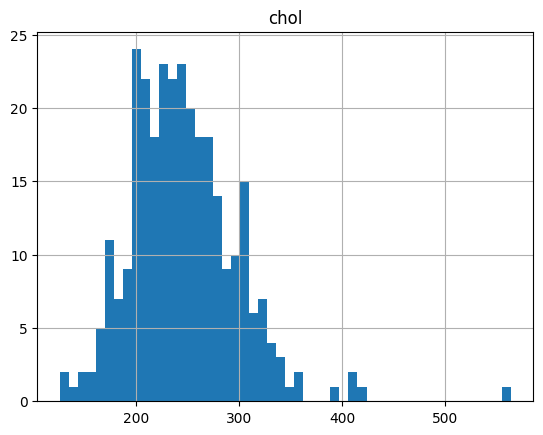

In [45]:
df.hist(column='chol', bins=50)

In [46]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

## step 3: Seprate X and Y

In [47]:
X = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']].values
X[:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [48]:
Y = df['output'].values
Y[:5]

array([1, 1, 1, 1, 1])

## step 4: Normalize Data

In [54]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X.astype(float))
X[:5]

array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
         2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
        -2.27457861, -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, -0.09273778,  0.07219949,
        -0.41763453,  0.89896224,  1.63347147, -0.69663055,  2.12257273,
        -2.27457861, -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, -0.09273778, -0.81677269,
        -0.41763453, -1.00583187,  0.97751389, -0.69663055,  0.31091206,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.18017482,  0.68100522,  0.03203122, -0.66386682, -0.19835726,
        -0.41763453,  0.89896224,  1.23989692, -0.69663055, -0.20670527,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.29046364, -1.46841752, -0.93851463, -0.66386682,  2.08204965,
        -0.41763453,  0.89896224,  0.58393935,  1.43548113, -0.37924438,
         0.97635214, -0.71442887, -0.51292188]])

## Step 5: Train Test Split

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)
print(f"train set: {x_train.shape, y_train.shape}")
print(f"test set: {x_test.shape, y_test.shape}")

train set: ((242, 13), (242,))
test set: ((61, 13), (61,))


## Step 6: Training based KNN

In [51]:
k = 4
neigh = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

## Step 7: Predicting

In [52]:
y_hat = neigh.predict(x_test)
y_hat[:5]

array([0, 0, 1, 1, 0])

## Step 8: Accuracy evaluation

In [53]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))

Train set Accuracy:  0.859504132231405
Test set Accuracy:  0.8032786885245902


## Step 9: testing this model

In [61]:
new_patient = [[ 48. ,   2. ,   1. , 248. , 186. ,   2. ,   1. , 158. ,   0. ,
          2.8,   1. ,   0. ,   0. ]]
new_patient_s = scaler.transform(new_patient)
if neigh.predict(new_patient_s) == 0:
  print("The probability of a heart attack in this patient is low")
else:
  print("The possibility of a heart attack is high for this patient")

The probability of a heart attack in this patient is low
